In [31]:
library(ggplot2)
capture.output(library(dplyr))
suppressMessages(library(tidyr))
capture.output(library(magrittr))

character(0)

character(0)

In [32]:
ae <- read.table("../data/AE122.txt", sep="\t", header=TRUE)
dem <- read.table("../data/DEMOG122.txt", sep="\t", header=TRUE)

# Example Preliminary Analysis
## Data Summaries and Balance in Treatment Arms

In the figure below we show kernel density estimates of the marginal distributions of the age, height, and weight, of the subjects in both the treatment and control arms.

Warning message:
“Removed 12 rows containing non-finite values (stat_density).”

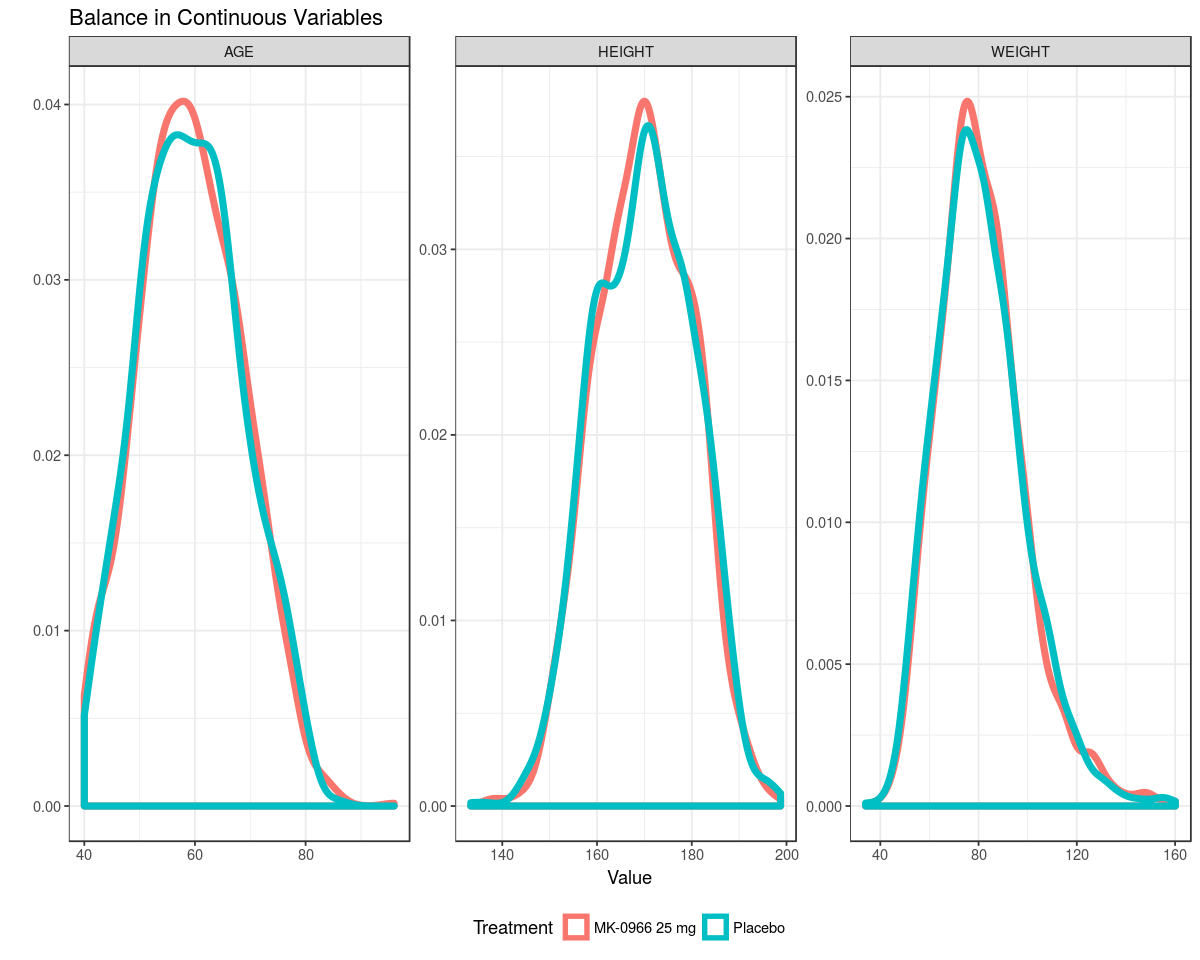

In [154]:
options(repr.plot.width=10, repr.plot.height=8)
# plot continuous variable marginal distributions
suppressWarnings(
    dem %>% 
    select(TREATMNT, AGE, HEIGHT, WEIGHT) %>%
    gather(var, val, -TREATMNT) %>%
    mutate(val=as.numeric(val)) %>%
    rename(Treatment=TREATMNT) %>%
    ggplot(aes(x=val, color=Treatment)) + 
    geom_density(position="identity", size=2) + 
    facet_wrap(~var, scales="free") + 
    theme_bw() + 
    ggtitle("Balance in Continuous Variables") + 
    ylab("") + xlab("Value") + 
    theme(legend.position = "bottom")
)

Warning message:
“Removed 12 rows containing non-finite values (stat_ecdf).”

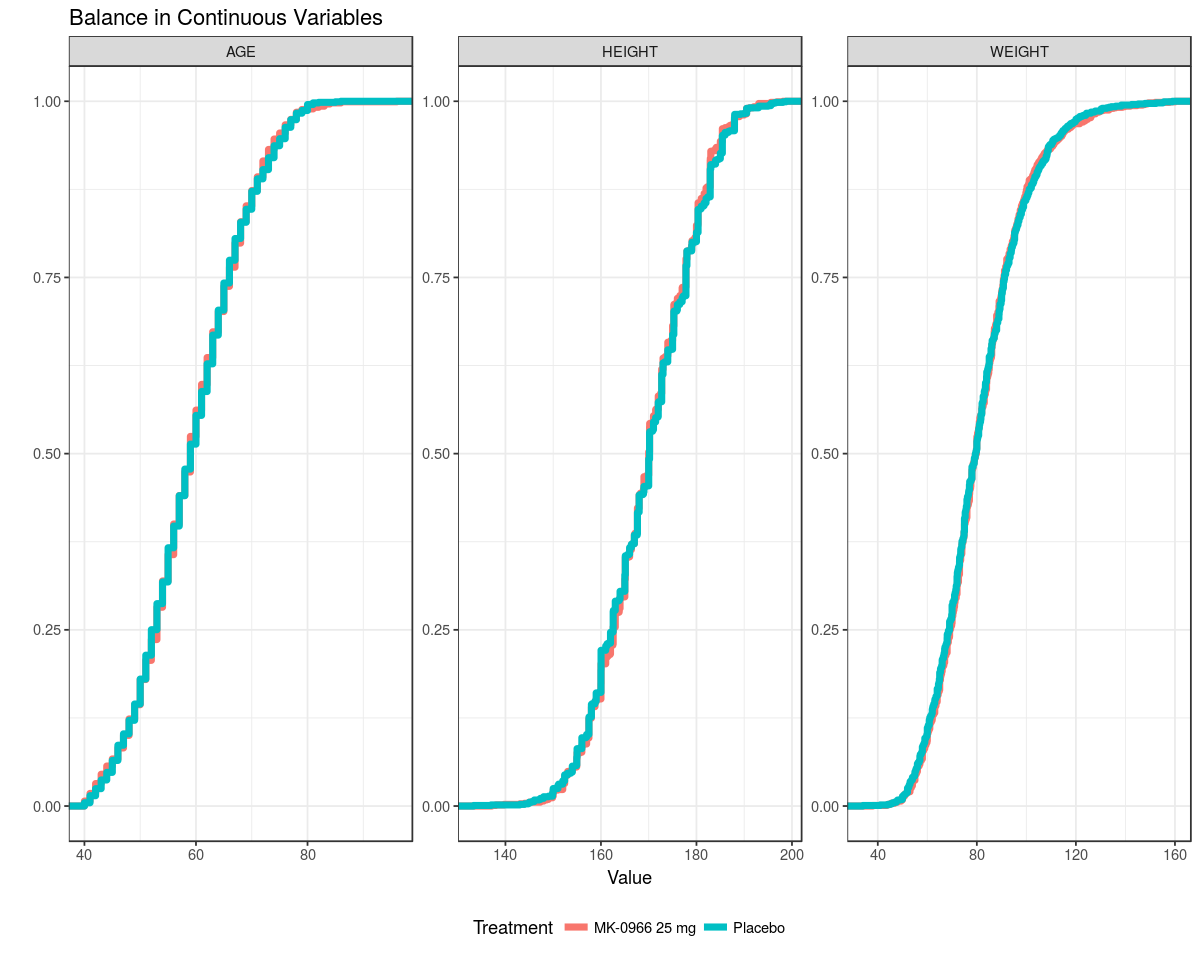

In [152]:
# options(repr.plot.width=10, repr.plot.height=8)
# # plot continuous variable marginal distributions
# suppressWarnings(
#     dem %>% 
#     select(TREATMNT, AGE, HEIGHT, WEIGHT) %>%
#     gather(var, val, -TREATMNT) %>%
#     mutate(val=as.numeric(val)) %>%
#     rename(Treatment=TREATMNT) %>%
#     ggplot(aes(x=val, color=Treatment)) + 
#     stat_ecdf(position="identity", size=2) + 
#     facet_wrap(~var, scales="free") + 
#     theme_bw() + 
#     ggtitle("Balance in Continuous Variables") + 
#     ylab("") + xlab("Value") + 
#     theme(legend.position = "bottom")
# )

In the following figure we show the marginal distributions of several categorical variables, including race and gender.

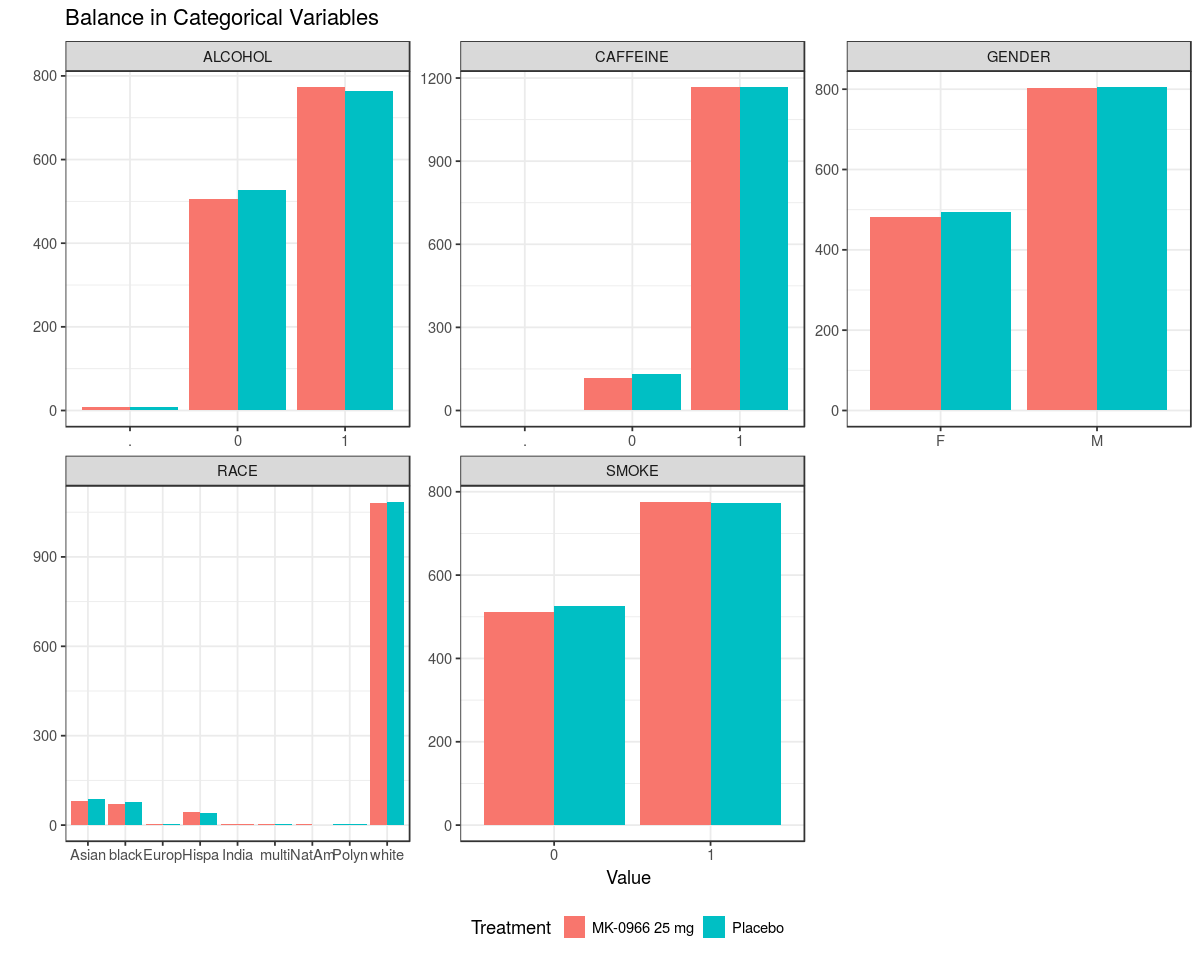

In [149]:
# plot categorical variable marginal distributions
suppressWarnings(
    dem %>% 
    select(TREATMNT, GENDER, RACE, ALCOHOL, SMOKE, CAFFEINE) %>%
    gather(var, val, -TREATMNT) %>%
    rename(Treatment=TREATMNT) %>%
    ggplot(aes(x=val, fill=Treatment)) + 
    geom_bar(position="dodge", size=2) + 
    facet_wrap(~var, scales="free") + 
    theme_bw() + 
    ggtitle("Balance in Categorical Variables") + 
    ylab("") + xlab("Value") + 
    theme(legend.position = "bottom")
)

The visual evidence above suggests that the marginal distributions of the treatment and control arms are well balanced. Below we compute a 2-sample $t$-test $p$-value for each variable (breaking the categorical variables apart if they have multiple levels). All of the $p$-values are large, suggesting that the study is indeed well-balanced.

In [129]:
# Compute ttest pvalues for balance plot
# conver data into a matrix
X <- dem %>% mutate(HEIGHT=as.numeric(HEIGHT)) %>%
    filter(RACE %in% c("Asian,", "black", "Hispa", "white")) %>%
    mutate(RACE = factor(RACE, levels=unique(RACE))) %>%
    model.matrix(~ AGE + HEIGHT + WEIGHT + GENDER + RACE +  
                  ALCOHOL +  SMOKE +  CAFFEINE - 1, .)
tr <- dem %>% mutate(HEIGHT=as.numeric(HEIGHT)) %>%
    filter(RACE %in% c("Asian,", "black", "Hispa", "white")) %>%
    select(TRT) %>% as.matrix() - 1

## Balance table before matching

## Balance table before matching
bbal <- t(t(apply(X, 2, function(x) t.test(x[tr==1], x[tr==0])$p.value)))
bbal <- data.frame(pval=bbal)
bbal$covariate <- rownames(bbal)


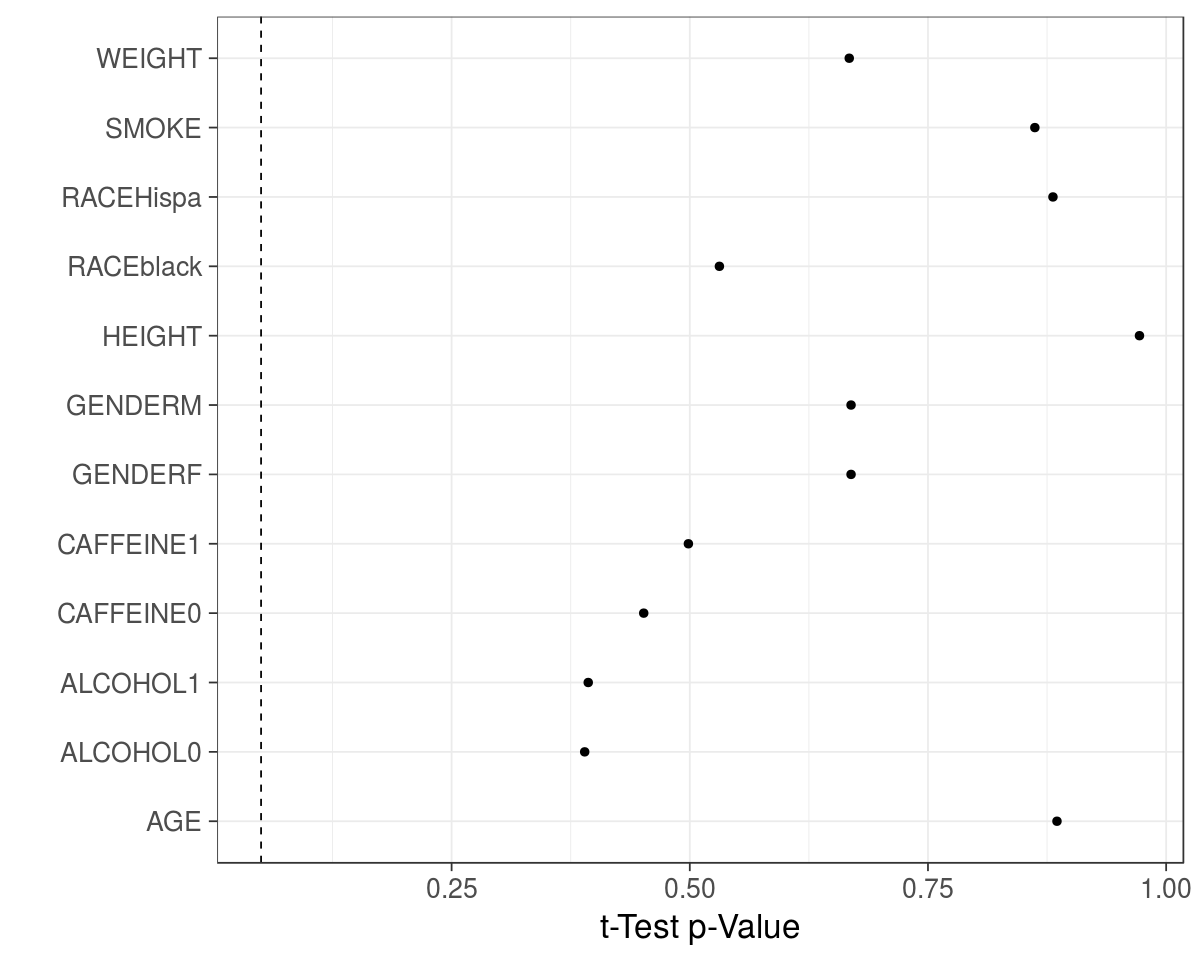

In [142]:
bbal %>% 
ggplot(aes(x=pval, y=covariate)) + 
geom_point(size=2) +
geom_vline(xintercept = 0.05, lty=2) + 
xlab("t-Test p-Value") + 
ylab("") + 
theme_bw(20)